# Cohort Analysis

In [36]:
# Import important libraries 
import pandas as pd 
import numpy as np 

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

# Import machine learning libraries
from sklearn.model_selection import train_test_split

## Load Dataset

In [37]:
df = pd.read_csv("../Cohort_Analysis/Dataset_ecommerce.csv")
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [38]:
# Descriptive Statistics
df.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [39]:
# Check for missing values
# (df.isnull().mean() * 100).round(2) # Percentage of missing values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [40]:
# Drop missing values
df.dropna(inplace=True)

# Check for missing values
# df.isnull().sum()

In [41]:
# Check for info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [42]:
# Convert the datatype of the InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# df.info()

## Exploratory Data Analysis

*Analysis by Country*

In [98]:
quantity_by_country = df.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()
quantity_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


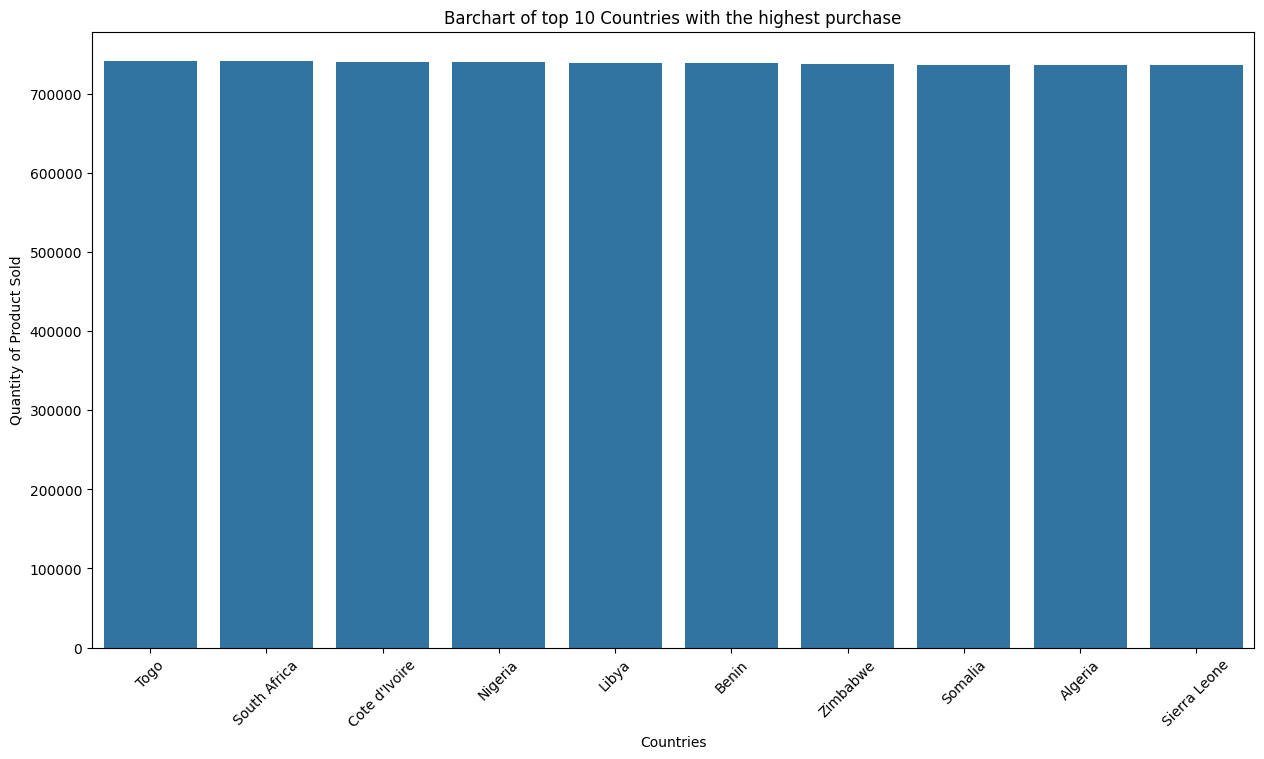

In [44]:
# Top 10 Countries with the highest quantity of items sold
top_10_country = quantity_by_country.head(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=top_10_country)
plt.title('Barchart of top 10 Countries with the highest purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

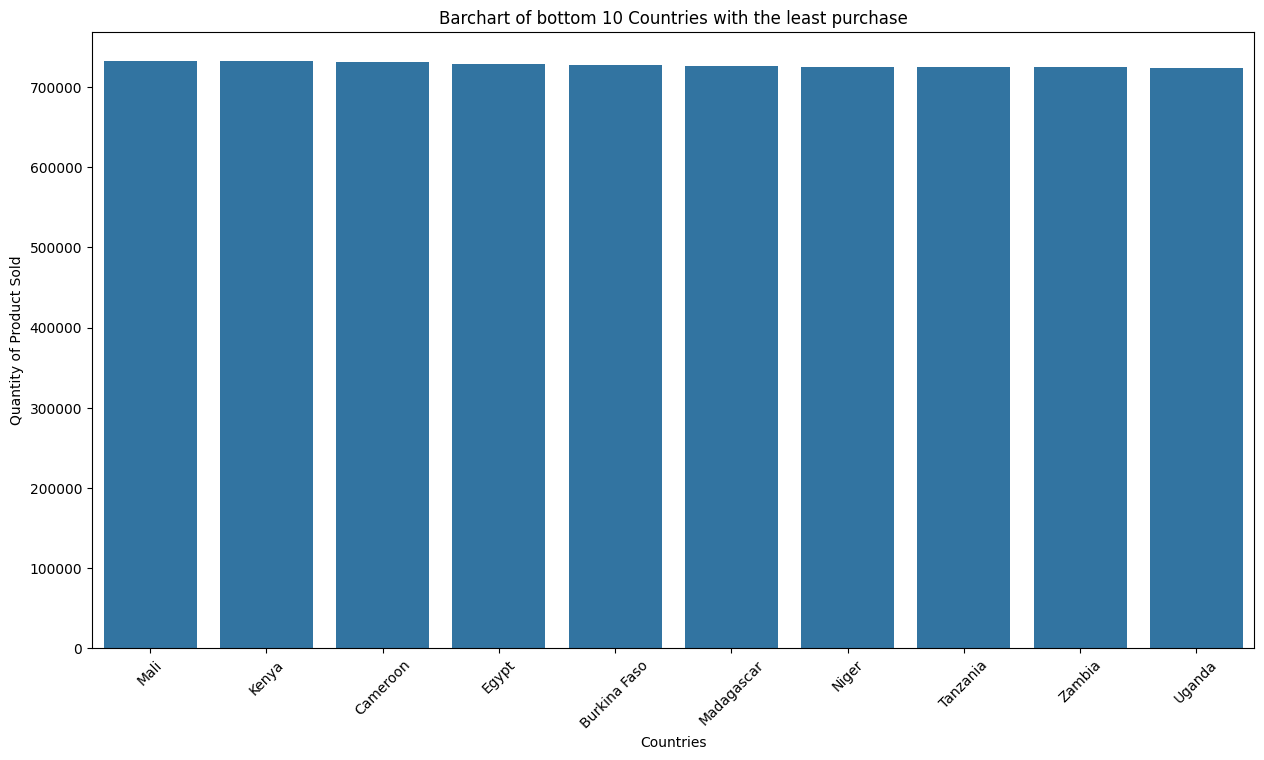

In [45]:
# Least 10 Countries with the lowest quantity of items sold
least_10_country = quantity_by_country.tail(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=least_10_country)
plt.title('Barchart of bottom 10 Countries with the least purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

*Analysis of countries and number of customers*

In [99]:
# Countries with the highest number of customers
customer_by_country = df.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer_by_country = customer_by_country.sort_values("CustomerID", ascending=False).reset_index()
customer_by_country.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


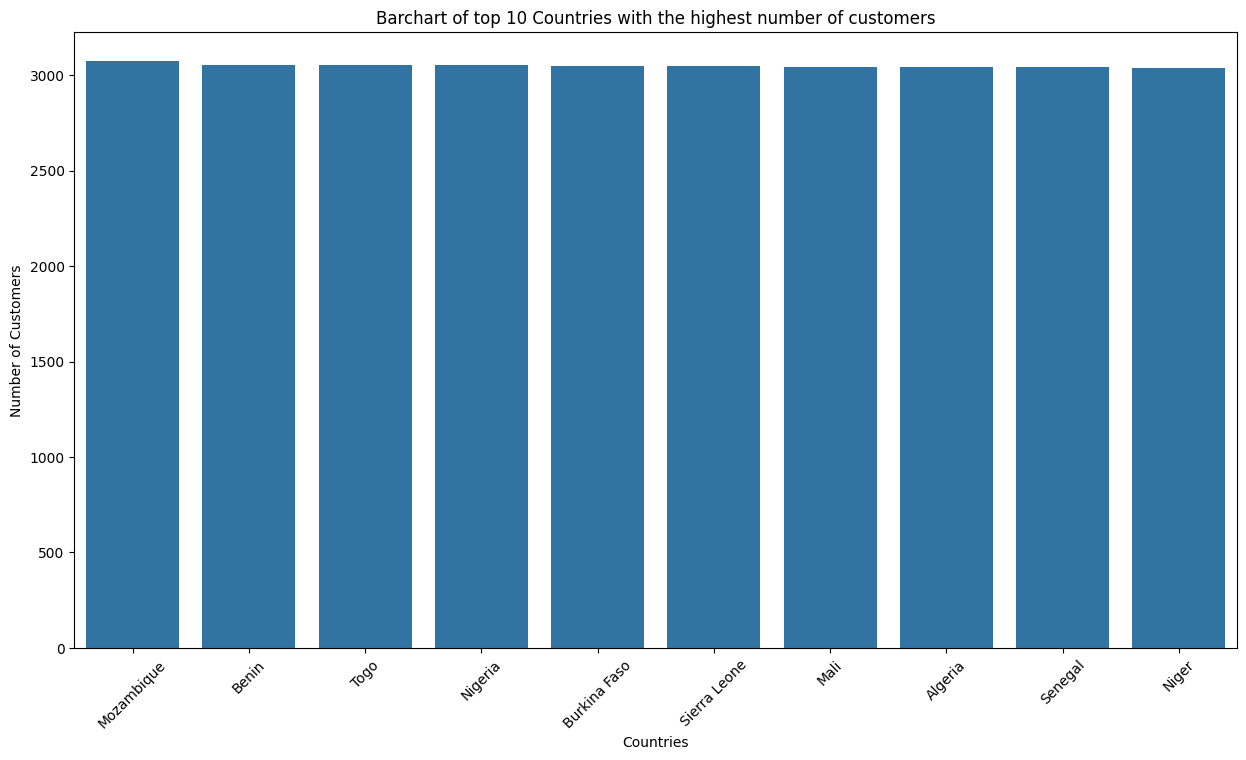

In [47]:
# Visualize
customer_by_country = customer_by_country.head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='CustomerID', data=customer_by_country)
plt.title('Barchart of top 10 Countries with the highest number of customers')
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

*Sales Trend Visualization*

In [48]:
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()
# monthly_sales.head()

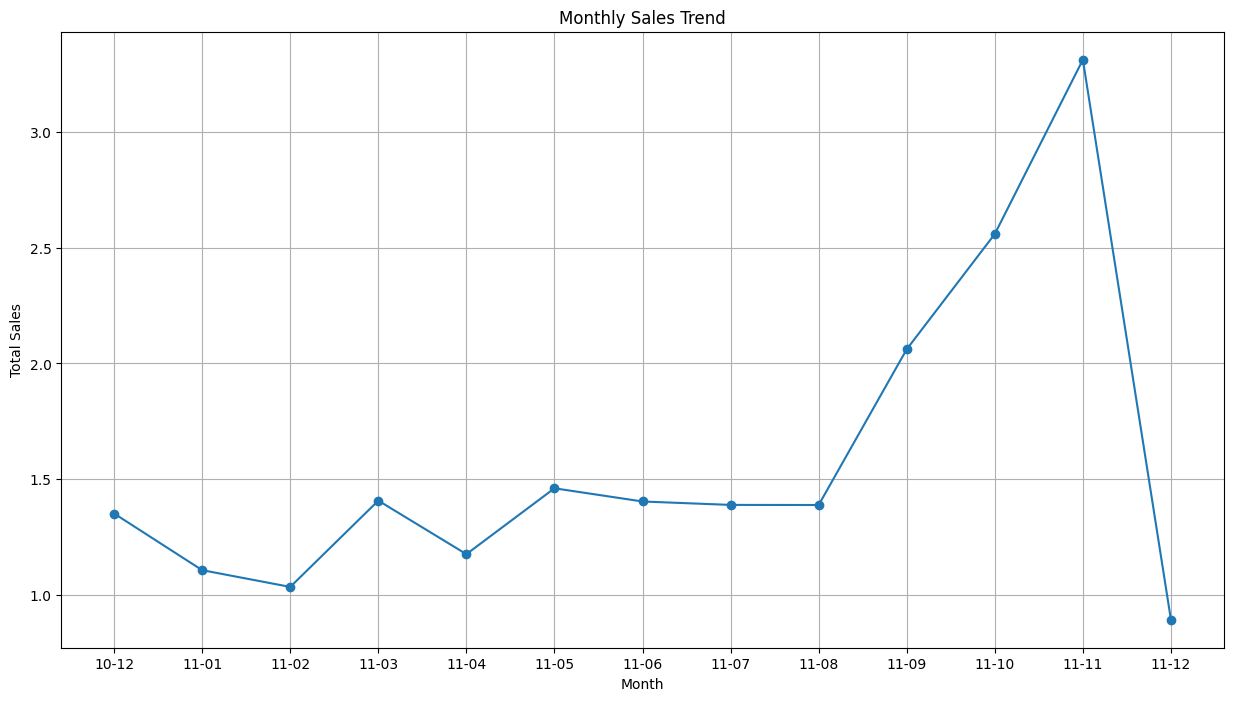

In [49]:
# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales.index.strftime("%y-%m"), (monthly_sales.values)/1e6, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Cohort Analysis

In [50]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [51]:
# Function to extract the year and month from the InvoiceDate
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [52]:
# Create a new column for the InvoiceMonth
df['InvoiceDate'] = df['InvoiceDate'].apply(get_month)
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [90]:
# First date the customer makes purchase
def get_cohort_date(df):
    df["cohort_date"] = df.groupby("CustomerID")["InvoiceDate"].transform("min")
    return df["cohort_date"]

In [89]:
df["cohort_date"] = get_cohort_date(df)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


## Cohort Index

In [55]:
# Function to extract the year and month from the InvoiceDate
def get_year_month(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [56]:
first_month, first_year = get_year_month(df, "cohort_date")
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

In [57]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

In [58]:
latest_month, latest_year = get_year_month(df, "InvoiceDate")

In [59]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [60]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [61]:
# Function to create a cohort index
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    cohort_index = year_diff * 12 + month_diff + 1
    return cohort_index

In [91]:
df["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


In [85]:
cohort_info = df.groupby(["cohort_date", "cohort_index"])["CustomerID"].nunique().reset_index()
cohort_info = cohort_info.rename(columns={"CustomerID": "Number of Customers"})
cohort_info

,cohort_date,cohort_index,Number of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [96]:
cohort_table = cohort_info.pivot(index="cohort_date", columns=["cohort_index"], values="Number of Customers")
cohort_table.index.strftime("%B, %Y")
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


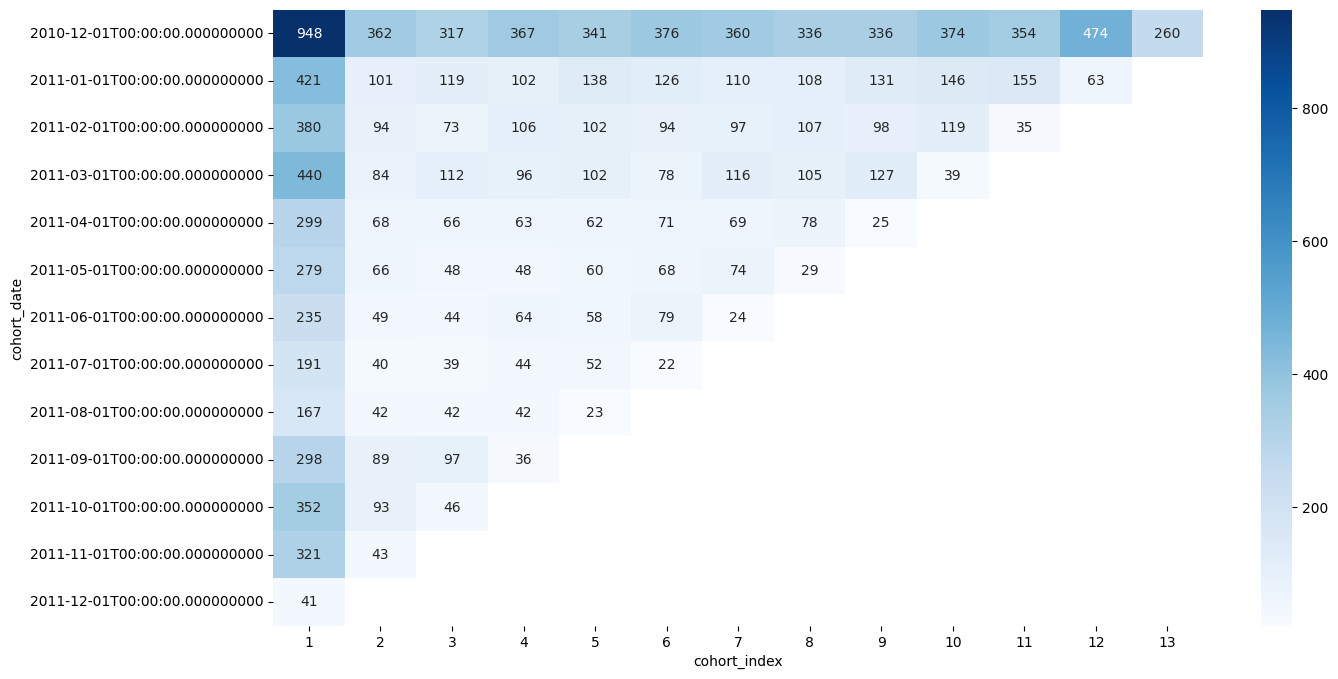

In [97]:
plt.figure(figsize=(15, 8))
sns.heatmap(cohort_table, annot=True, fmt=".0f", cmap="Blues");

In [87]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0) * 100
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,100.0,38.185654,33.438819,38.713080,35.970464,39.662447,37.974684,35.443038,35.443038,39.451477,37.341772,50.000000,27.42616
2011-01-01,100.0,23.990499,28.266033,24.228029,32.779097,29.928741,26.128266,25.653207,31.116390,34.679335,36.817102,14.964371,NaN
2011-02-01,100.0,24.736842,19.210526,27.894737,26.842105,24.736842,25.526316,28.157895,25.789474,31.315789,9.210526,NaN,NaN
2011-03-01,100.0,19.090909,25.454545,21.818182,23.181818,17.727273,26.363636,23.863636,28.863636,8.863636,NaN,NaN,NaN
2011-04-01,100.0,22.742475,22.073579,21.070234,20.735786,23.745819,23.076923,26.086957,8.361204,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.655914,17.204301,17.204301,21.505376,24.372760,26.523297,10.394265,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.851064,18.723404,27.234043,24.680851,33.617021,10.212766,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.942408,20.418848,23.036649,27.225131,11.518325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.149701,25.149701,25.149701,13.772455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


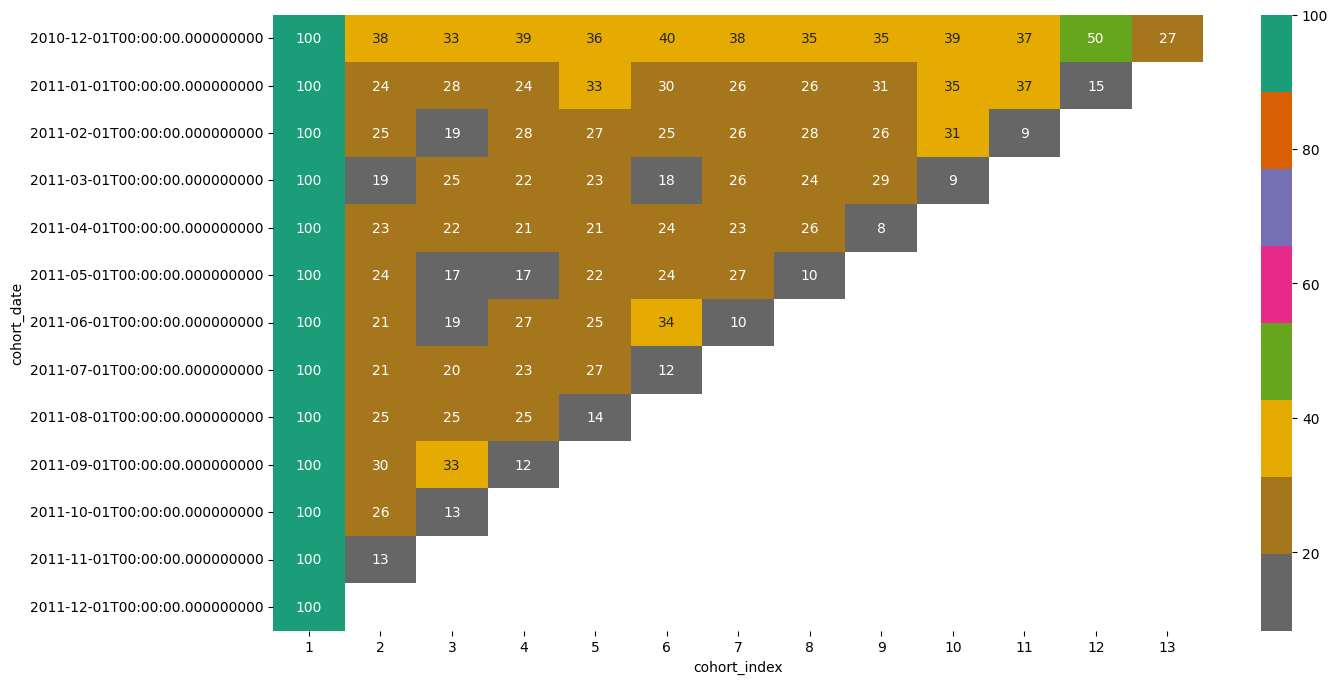

In [67]:
plt.figure(figsize=(15, 8))
sns.heatmap(new_cohort_table, annot=True, fmt=".0f", cmap="Dark2_r");

**Quantity Bought**

In [88]:
quantity_bought = df.groupby(["cohort_date", "cohort_index"])["Quantity"].mean().reset_index()
quantity_bought

,cohort_date,cohort_index,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [93]:
quantity_table = quantity_bought.pivot(index="cohort_date", columns=["cohort_index"], values="Quantity")
quantity_table.index.strftime("%B, %Y")
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
2011-01-01,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
2011-02-01,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
2011-03-01,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
2011-04-01,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
2011-05-01,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
2011-06-01,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


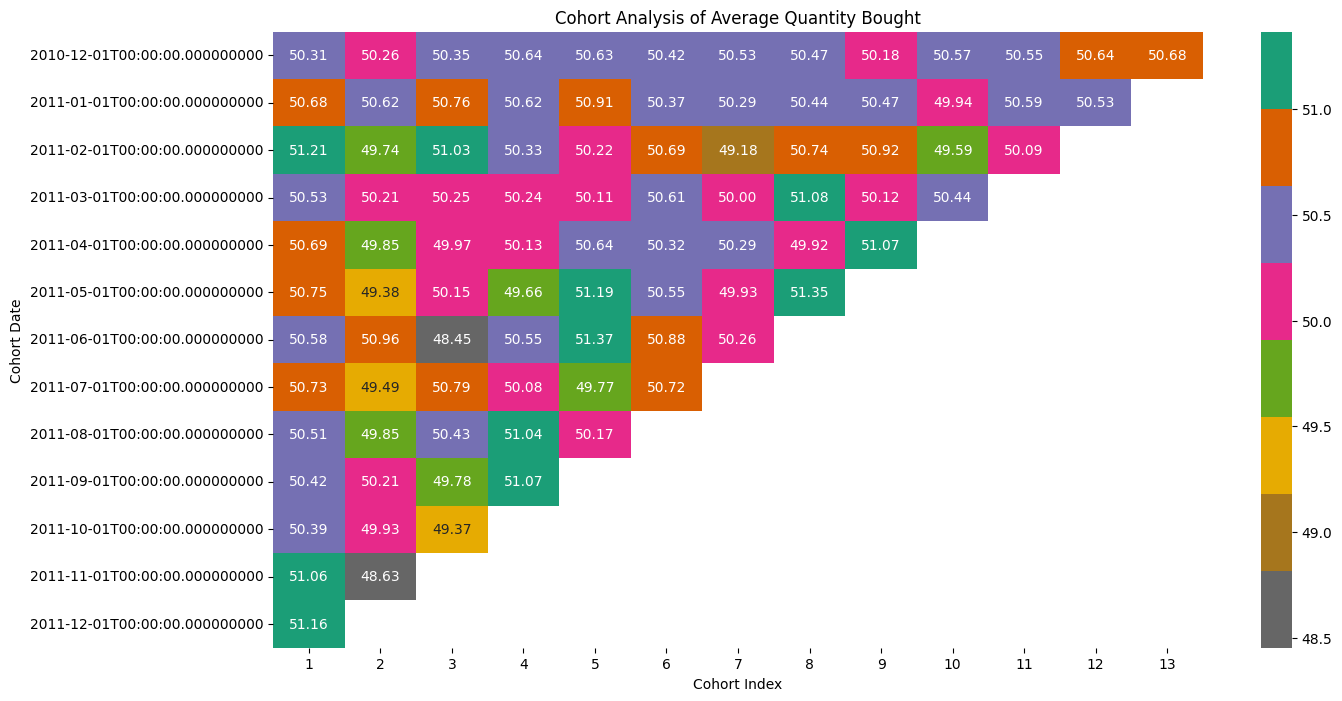

In [70]:
plt.figure(figsize=(15, 8))
sns.heatmap(quantity_table, annot=True, fmt=".2f", cmap="Dark2_r")
plt.title("Cohort Analysis of Average Quantity Bought")
plt.xlabel("Cohort Index")
plt.ylabel("Cohort Date")
plt.show();